# Chapter 3. Classification

## MNIST
#### About Data
The MNIST dataset, which is a set of 70,000
small images of digits handwritten by high school students and employees
of the US Census Bureau.

In [1]:
from sklearn.datasets import fetch_openml

# download the data
mnist = fetch_openml('mnist_784', as_frame=False) 

In [2]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
X.shape      #2D-array

(70000, 784)

There are 70,000 images, and each image has 784 features. 

In [4]:
y.shape      #1D array

(70000,)

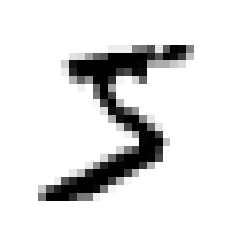

In [5]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [6]:
y[0]

'5'

In [7]:
#from string to integer
import numpy as np
y = y.astype(np.uint8)

### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], X[60000:]

### Training a Binary Classifier


In [9]:
y_train_5 = (y_train == 5)   # True for all 5s
y_test_5 = (y_test == 5)

#### Stochastic Gradient Descent (SGD) classifier

In [10]:
from sklearn.linear_model import SGDClassifier

# model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# using the model to detect number of 5s
sgd_clf.predict([some_digit])

array([ True])

### Evaluation of Model

#### Measuring the Accuracy 


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,
               scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

It can be observed the model's accuracy is above 95%

#### Dummy Classifier

In [13]:
from sklearn.dummy import DummyClassifier
# model
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict([X_train])))   # predicts False, no 5s

False


In [14]:
# model's accuracy
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrix

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

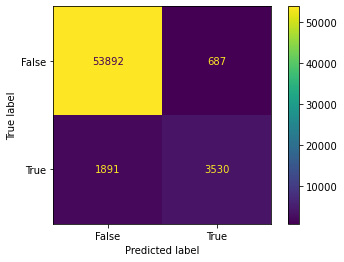

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

In [18]:
# pretend perfection
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [19]:
# report of the model
from sklearn.metrics import classification_report
print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



from the report, if when it claims an image represent 5, it is 84% correct and it detects it 65% of the time.

### Precision and Recall Tradeoffs

In [20]:
# returns a score of each instance
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores

array([2164.22030239])

In [21]:
threshold = 0   # set threshold
y_some_digit_pred = (y_scores > threshold)   # prediction 
y_some_digit_pred

array([ True])

it can be observed that threshold is 0

In [22]:
threshold = 3000   #set thresold
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Raising threshold decreases the recall

####  Deciding on what threshold to use 

In [23]:
# scores of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

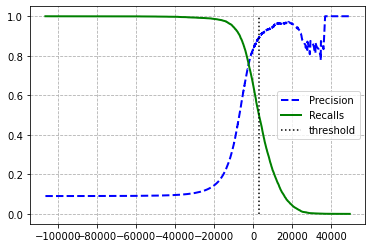

In [25]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recalls", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid(True, linestyle="--")
plt.legend()
plt.show()

#### Selecting Good Precision Tradeoff 2

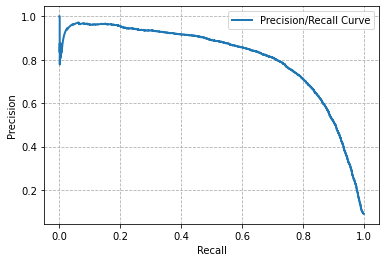

In [26]:
%matplotlib inline
plt.plot(recalls, precisions, 
         linewidth=2, label="Precision/Recall Curve")
plt.grid(True, linestyle="--")
plt.tick_params(labelsize=10)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [27]:
# 90% Precision
idx_for_90_precision = (precisions >= 0.9).argmax() #returns max first index
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [28]:
# prediction
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [29]:
# check the metrics
print(classification_report(y_train_5, y_train_pred_90))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97     54579
        True       0.90      0.48      0.63      5421

    accuracy                           0.95     60000
   macro avg       0.93      0.74      0.80     60000
weighted avg       0.95      0.95      0.94     60000



it can be observed that the precision is 90% while the recall 48%. This seems to be a good tradeoff for the model

#### The ROC Curve

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [31]:
idx_for_threshold_at_90 = (thresholds <=
                           threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

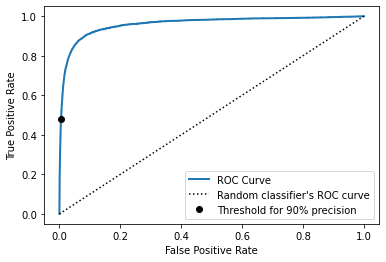

In [32]:
# plot roc curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
#dummy classifier
plt.plot([0, 1], [0, 1], "k:", 
         label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

The higher the recall (TPR), the more false
positives (FPR) the classifier produces

In [33]:
from sklearn.metrics import auc, roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

96% accuracy on the majority class which is negative. So this metric is not good for the model.

#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
#initialize model
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, 
                                    X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [35]:
y_probas_forest[:2] # class probs for first two images 

array([[0.11, 0.89],
       [0.99, 0.01]])

In [36]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

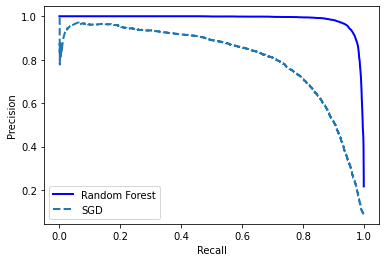

In [37]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5,
                                                                              y_scores_forest)
 
plt.plot(recalls_forest, precisions_forest, "b-",linewidth=2, 
         label="Random Forest" )
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend()
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [38]:
# positive proba
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5 

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [39]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [40]:
print(classification_report(y_train_5, y_train_pred_forest))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     54579
        True       0.99      0.87      0.93      5421

    accuracy                           0.99     60000
   macro avg       0.99      0.94      0.96     60000
weighted avg       0.99      0.99      0.99     60000



A preocision of 99% and with a recall of 87% which is actually good for the model.

### MULTICLASS CLASSIFICATION

#### Support Vector Machine Classifiers

In [41]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
# fit a few portion of data
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, != y_train_5 

SVC(random_state=42)

In [42]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [43]:
# decision function for the scores
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

highest score is 9.3

In [44]:
# index of the predicted score
class_id = some_digit_scores.argmax()
class_id

5

In [45]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [46]:
# actual value of the most predicted class
svm_clf.classes_[class_id]

5

#### One Vs Rest Classifier

In [47]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [48]:
ovr_clf.predict([some_digit])  # predict

array([5], dtype=uint8)

In [49]:
len(ovr_clf.estimators_)

10

#### Trying the SGDClassifier

In [50]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

model predicted wrongly

In [51]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

all the scores were negative expect 3. Since there were 10 classes the model trained 10 instead of 45. 

In [52]:
# metrics 
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [53]:
# scaling the inputs and leaving the outputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [54]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, 
               scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

it can be seen that theaccuracy has increased after scaling the input data

### Error Analysis

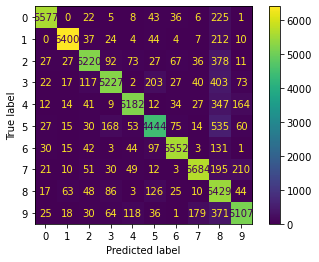

In [55]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)  # cross val pred.
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()  #display plot


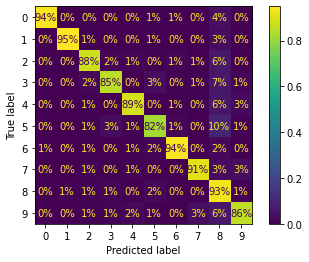

In [56]:
# converts the valujes to percentages
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", 
                                       values_format=".0%")
plt.show()  # plot

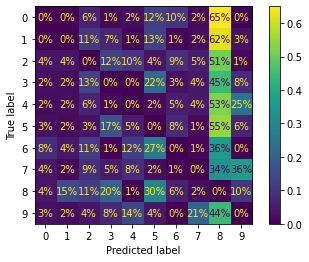

In [57]:
# view the errors
sample_weight = (y_train != y_train_pred)  # setting the weight
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", 
                                       sample_weight=sample_weight, values_format=".0%")
plt.show()  # plot

The 36% in row #7, column #9 means that 36% of the
errors the model made on images of 7s were misclassifications as 9s

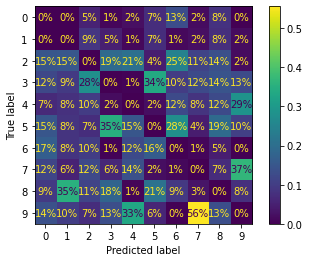

In [58]:
# view the errors
sample_weight = (y_train != y_train_pred)  # setting the weight
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="pred", 
                                       sample_weight=sample_weight, values_format=".0%")
plt.show()  # plot

It can be see that 56% of misclassified 7s are
actually 9s

### Multilabel Classification

A classification that outputs multiple binary tags

#### KNeighbors

In [63]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]   # adds another dimension to the shape

# model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# predict
knn_clf.predict([some_digit])

array([[False,  True]])

some_digit = 5, therefore False for even, True for odd

In [66]:
# Selecting the metrics
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

Assumes all the labels are equally important, therefore equal weights is given to each class

In [67]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

`average="weighted"`Gives weight based on the number of instances with the target variable

#### ClassifierChain

Classifier chains are a way of combining a number of binary classifiers into a single multi-label model that is capable of exploiting correlations among targets.

In [73]:
from sklearn.multioutput import ClassifierChain

# model
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

chain_clf.predict([some_digit])

array([[0., 1.]])

### Multioutput Classification  

It is a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

In [75]:
# generating a noise data
np.random.seed(42) # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

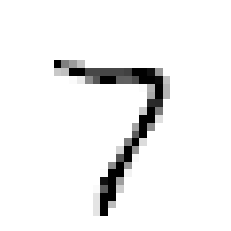

In [76]:
# a classifier that cleans it
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()